# Dimensionality reduction technique (After Feature Engineering)
* To reduce features  >> less no of features >> less complexity >> less computational cost   
* In Dimensionality Reduction technique we convert high dimensional dataset to low dimensional dataset in such that it will retain some meaningful properties from the original dataset.
* we need to check feature importance
* we have two techniques for that
1. Feature selection
2. Feature Extraction(Pricipal Component Analysis[PCA])

> Feature selection
* From all the features available in the original dataset we will select the most relevant features and build a model on that features.
* we are selecting a subset of the original dataset containing the most relevant features.
* Or we can also say that we are removing noisy , irrelevant ,redundent features from the original dataset.
* We have 3 methods in feature selection 
1. Filter method    >>   Before Model Training
2. Wrapper method   >>   At the time of Model Training
3. Embedded method  >>   After Model Building  (In decision tree algorithm after model building we used feature importance to see the relevant features)

* Benefits of Feature Selection
1. It helps in avoiding curse of dimensionality.
2. It helps in reducing overfitting.
3. It reduces training and testing time.
4. It helps improve accuracy 

> Filter method >> Before Model Training
1. Corelation
* Pearson correlation coefficient (Continous[X] vs Continuous[Y])  (R value)
* Spearman correlation coefficient (Continous[X] vs Continuous[Y])
* Kendall correlation coefficient (Categorical[X] vs Continuous[Y])

* R = Covariance(X,Y) / Standard Deviation(X,Y) >> for Pearsons Corelation Coefficient
* We use coefficient of correlation (R) to compare above techniques and find out the relevant features.
* if the linearity between the independent variables and dependent variables is constantly changing then we will get good result using spearman correlation coefficient.
* If there are oultiers available in idependent variables then we will get good result using spearman correlation coefficient.
* In Kendall we get results not as good as the Spearman correlation coefficient and the pearson correlation coefficient so in real life case we will not use Kendall correlation coefficient thatoften.

> Quick revision 
* Residuals >> actual - predicted >> Error 
* R >> Coefficient of Corelation >> It shows linear relationship between 2 variables
* R2 >> Coefficient of Determination >> how much dependent(Y) is explainable using independent varaibles(X1,X2,X3)

2. Fishers Score (from skfeature.function.similarity_based import fisher_score)
*  It returns a rank of variables (Features) in descending order.

3. Missing Value ratio 
* We need to understand the problem statement clearly before handling missing values.
* By understanding problem statement we can judge by what we have to replace the missing values.

4. Variance threshold method
* If variance of any feature is zero then that feature is of no use.
* Feature having maximum variance shows maximum information about that feature and Feature having minimum variance shows minimum information about that feature.
* When we will get minimum variance when we have all close to similar values in that feature.If there is no variance in a particular feature it will not be able to predict the dependent variable.

5. Variance inflation factor(VIF)
* VIF = 1 / (1 - R2)
* Suppose we have X1,X2,X3 as independent variables and Y as dependent variable.
* In Variance inflation factor(VIF) we first of all exclude the target variable(Y) then when we have only independent variables(X1,X2,X3),for calculation VIF of X1 we will consider X1 as dependent variable and X2,X3 as independent variables.We will calculate the R2 score use it in (VIF = 1 / (1 - R2)) and we will get the VIF for X1 .
* VIF range >>   VIF = 0      >> No Multicolinearity
                1  to  5      >> Moderate Corelation
                5  to  10     >> High Corelation
                VIF > 10      >> Very high Corelation 
* Our VIF should be as low as possible.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
boston_df = pd.read_csv("Boston.csv")
boston_df.drop("Unnamed: 0",axis=1,inplace=True)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
corr =boston_df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

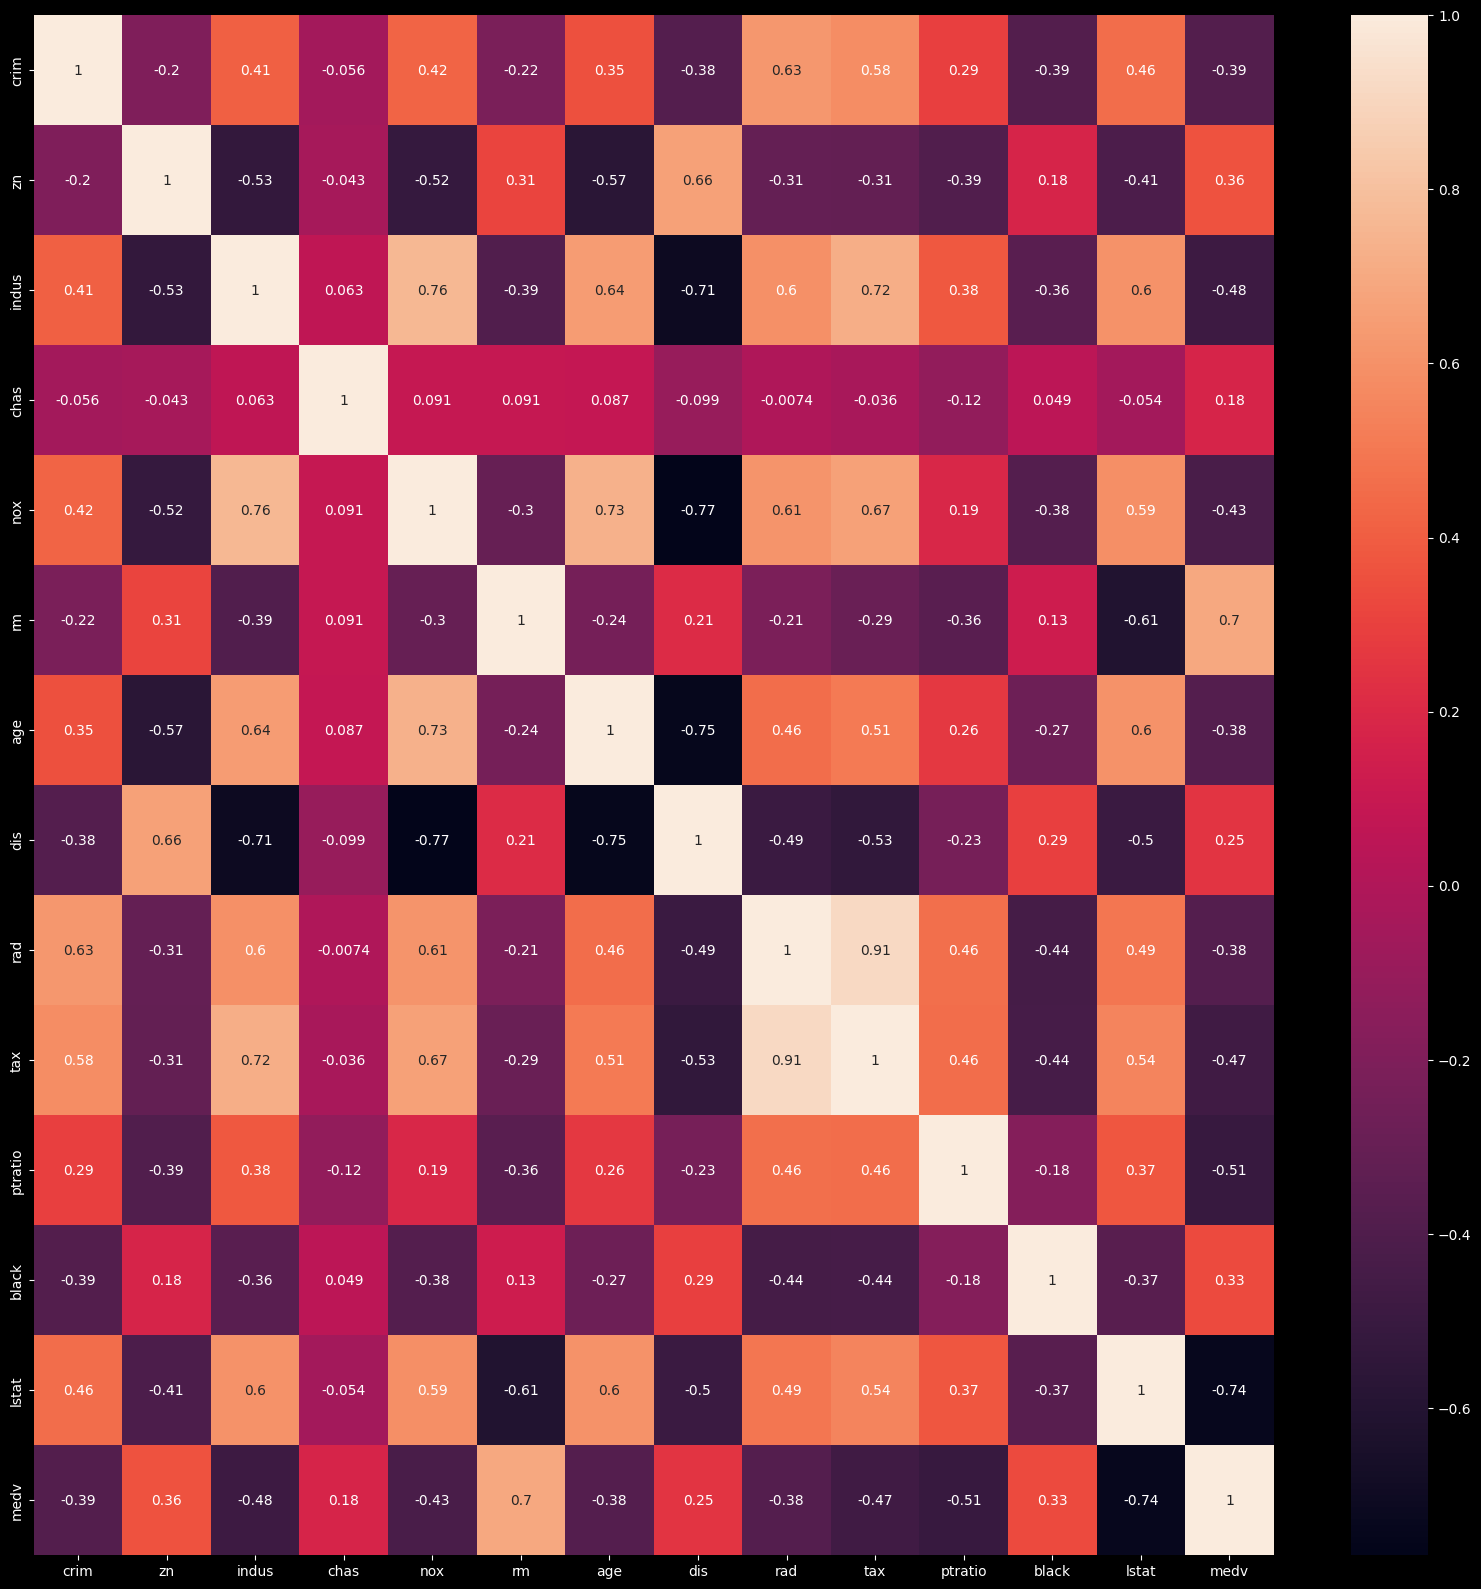

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

<Axes: >

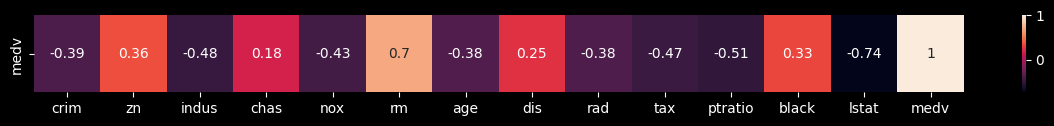

In [5]:
corr = boston_df.corr().tail(1)
plt.figure(figsize=(15,1))
sns.heatmap(corr,annot=True)

<Axes: xlabel='rm', ylabel='medv'>

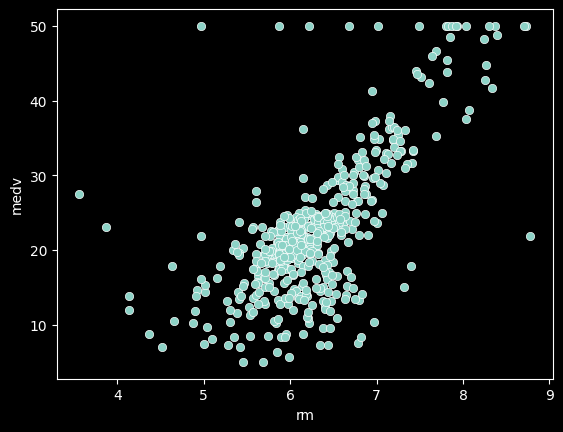

In [6]:
# to check the corelation between independent variables and dependent variables
sns.scatterplot(x=boston_df["rm"],y=boston_df["medv"])

<Axes: xlabel='lstat', ylabel='medv'>

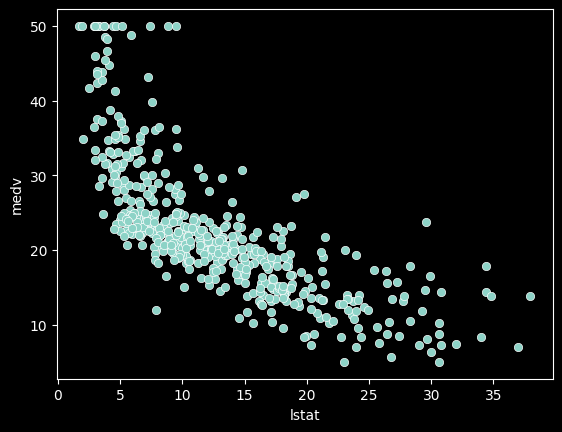

In [7]:
# to check the corelation between independent variables and dependent variables
sns.scatterplot(x=boston_df["lstat"],y=boston_df["medv"])

<Axes: xlabel='chas', ylabel='medv'>

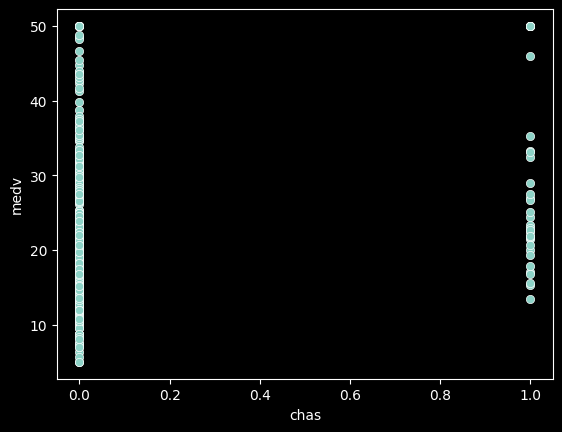

In [8]:
# to check the corelation between independent variables and dependent variables
sns.scatterplot(x=boston_df["chas"],y=boston_df["medv"])

<Axes: xlabel='rad', ylabel='medv'>

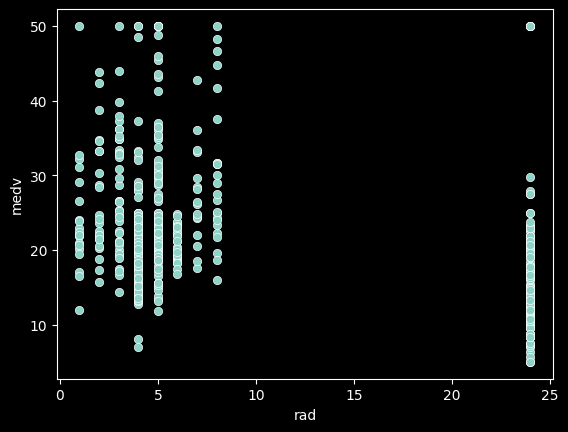

In [9]:
# to check the corelation between independent variables and dependent variables
sns.scatterplot(x=boston_df["rad"],y=boston_df["medv"])

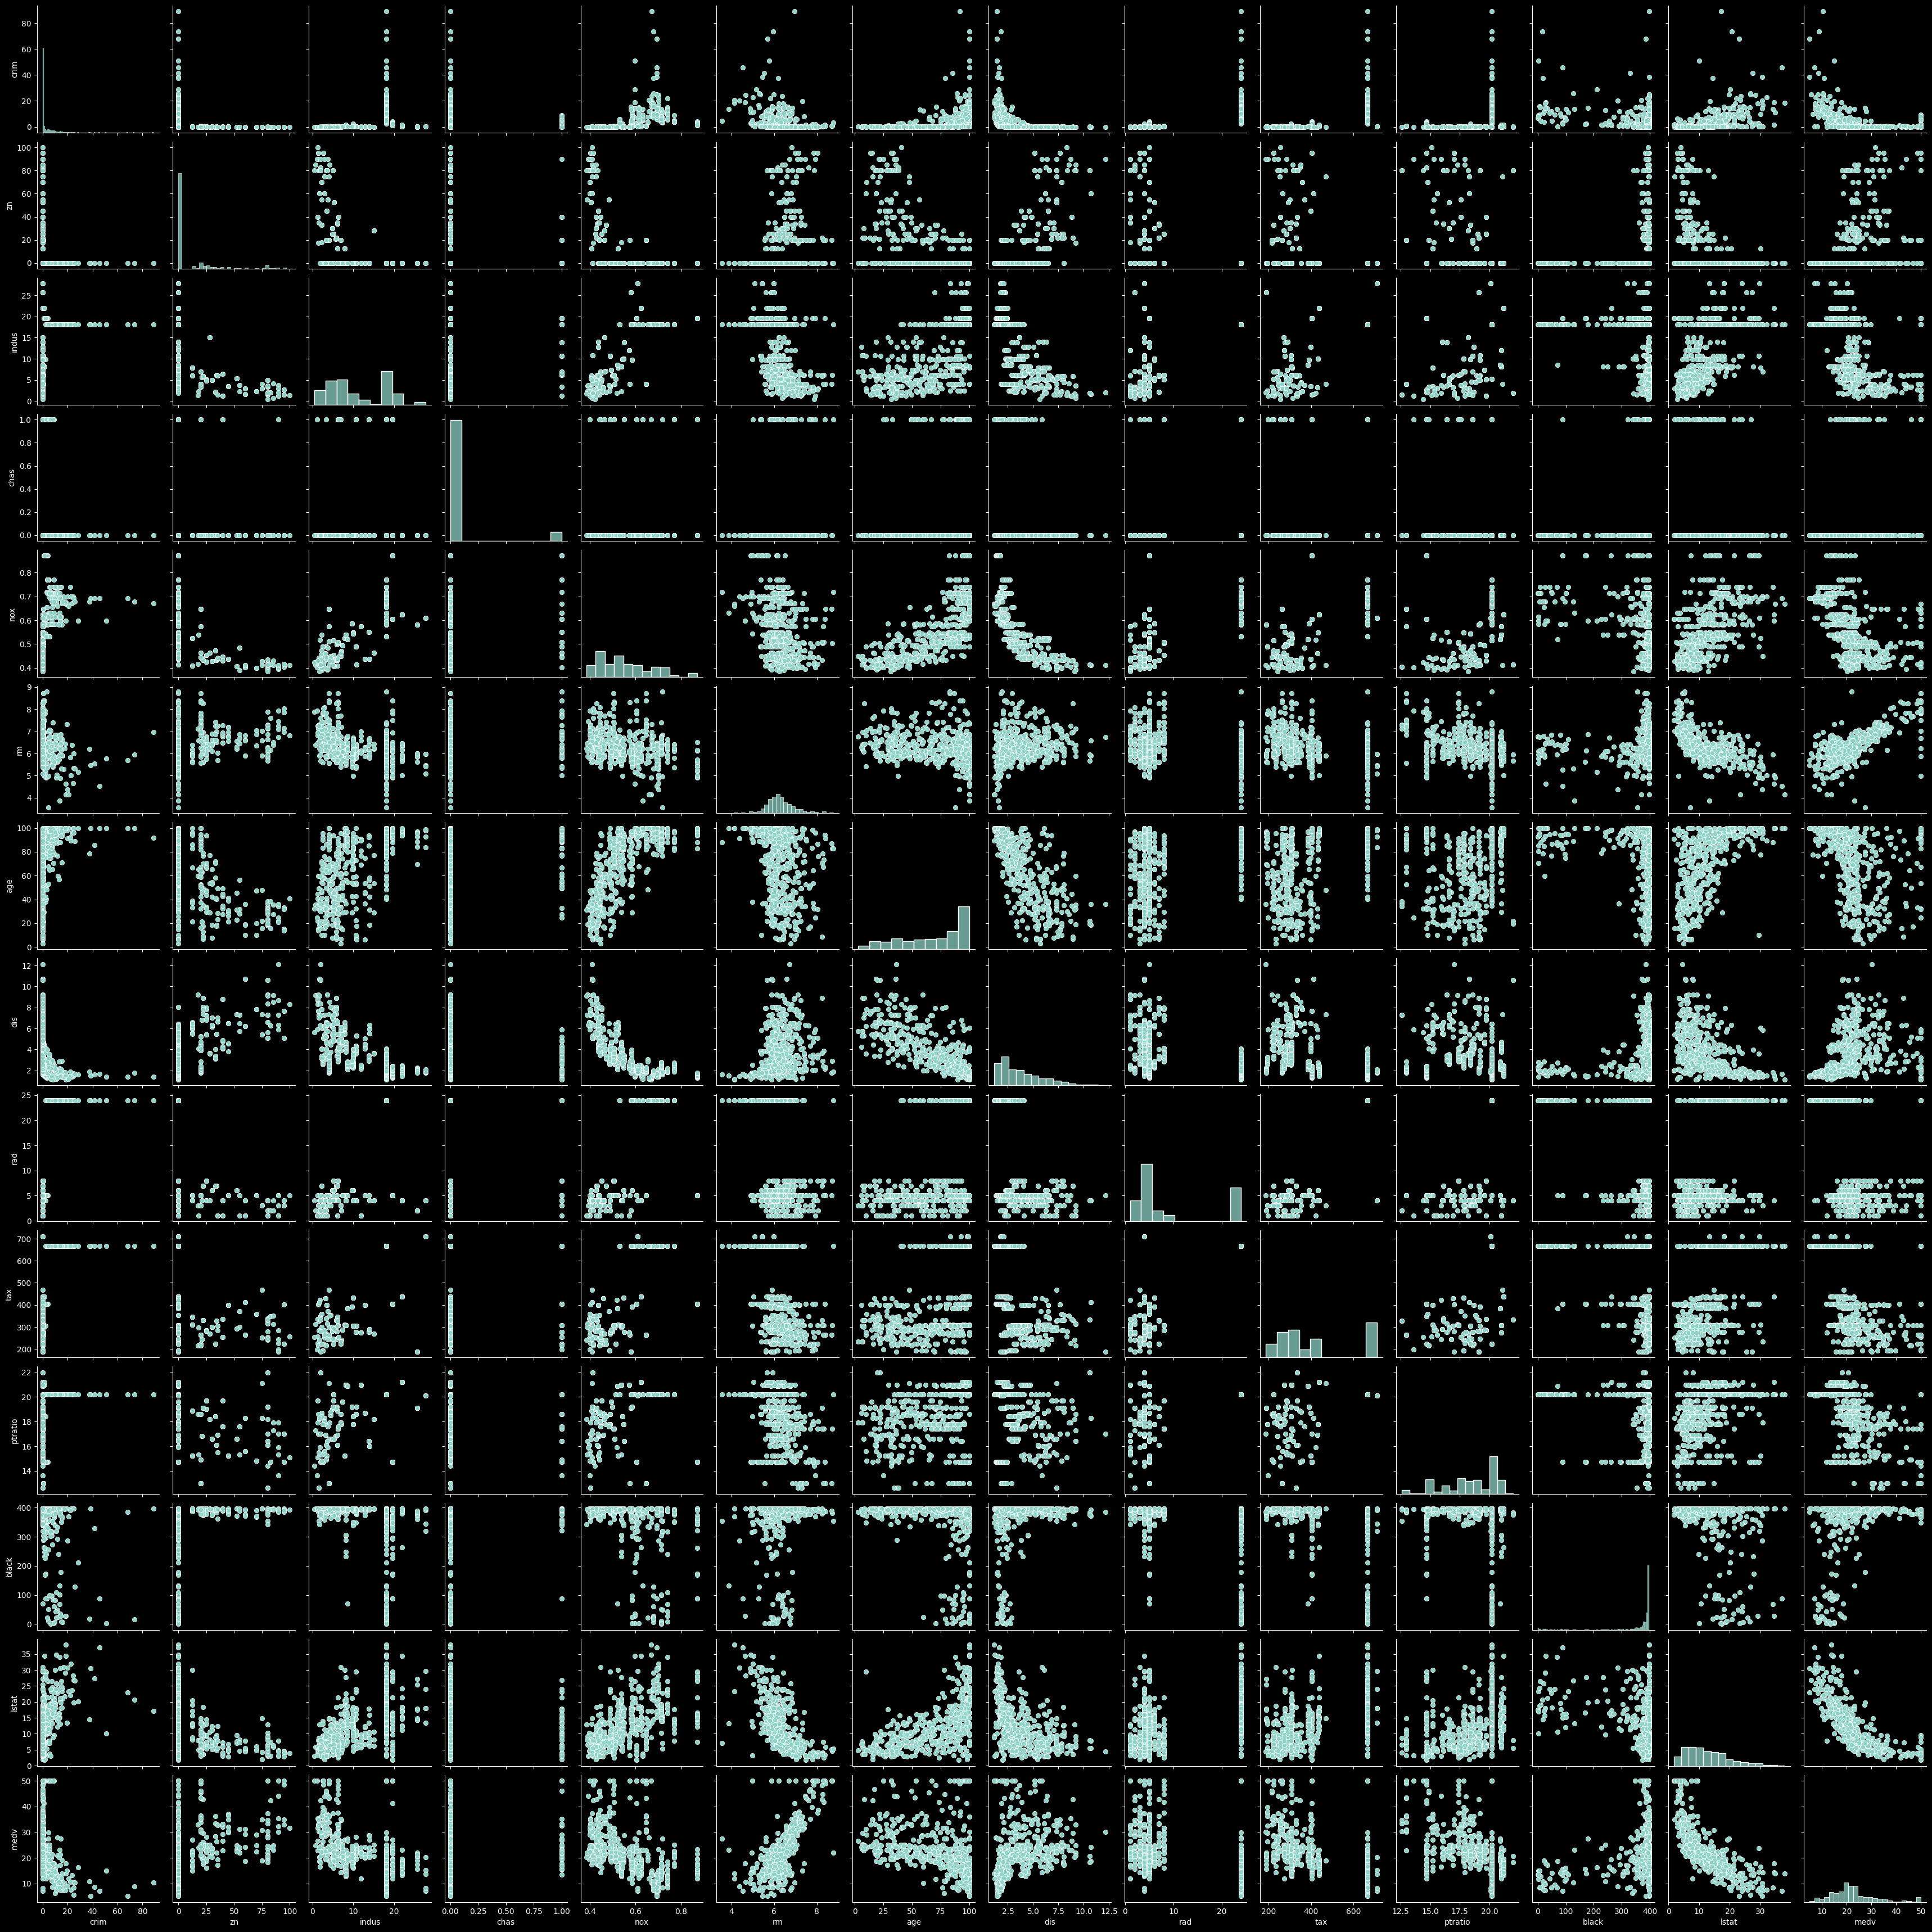

In [10]:
# to check corelation between all features
sns.pairplot(boston_df)

Spearmen corelation coefficient


<Axes: >

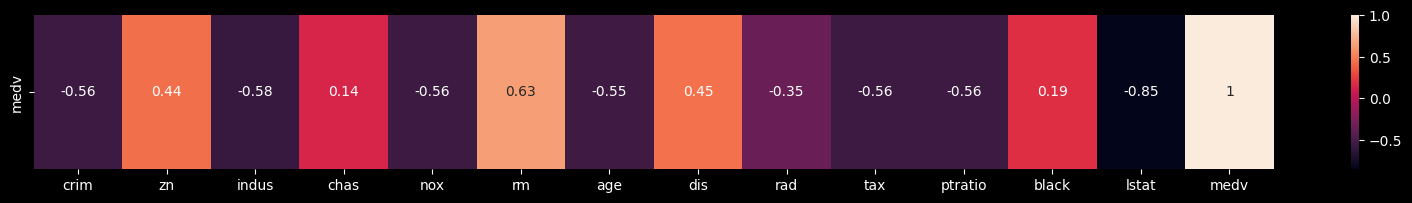

In [11]:
corr = boston_df.corr(method="spearman").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

Pearson Correlation coefficient

<Axes: >

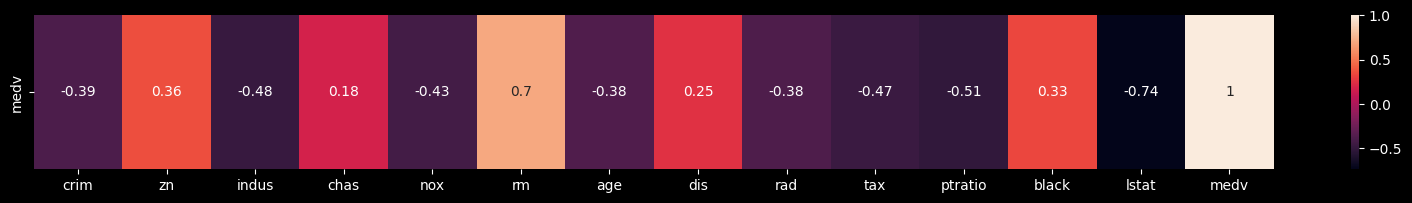

In [12]:
corr = boston_df.corr(method="pearson").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

Kendall Corr Coefficient

<Axes: >

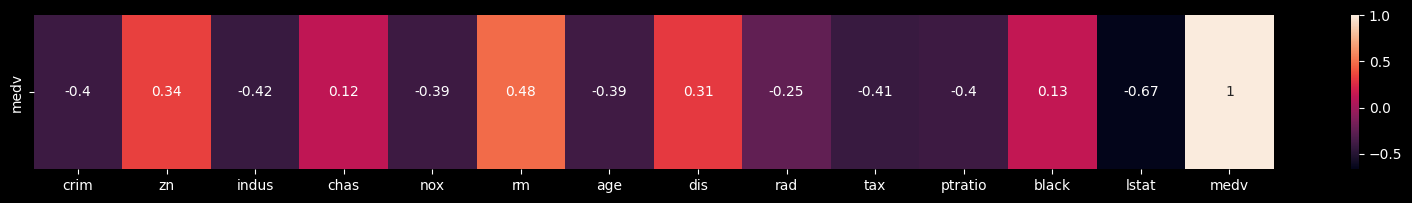

In [13]:
corr = boston_df.corr(method="kendall").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

# 2.Fishers Score 

* It returns a rank of Variables (Features) in descending order.

In [14]:
from skfeature.function.similarity_based import fisher_score

In [15]:
from sklearn.datasets import load_wine


In [16]:
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
wine_df["Target"] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
x=wine_df.drop("Target",axis=1)
y=wine_df["Target"]


Pearson correlation coefficient

<Axes: >

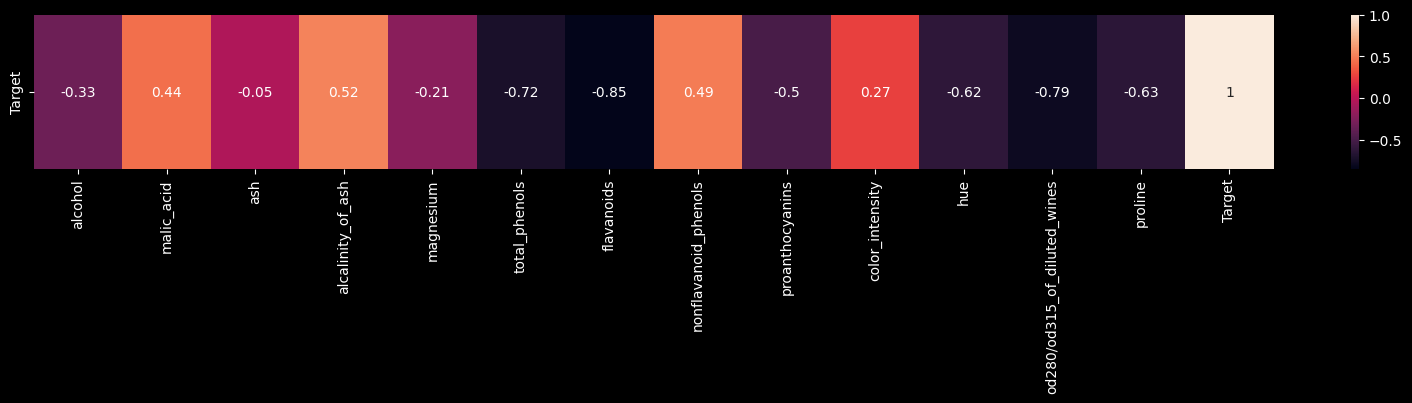

In [18]:
corr = wine_df.corr().tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

Spearman correlation coefficient

<Axes: >

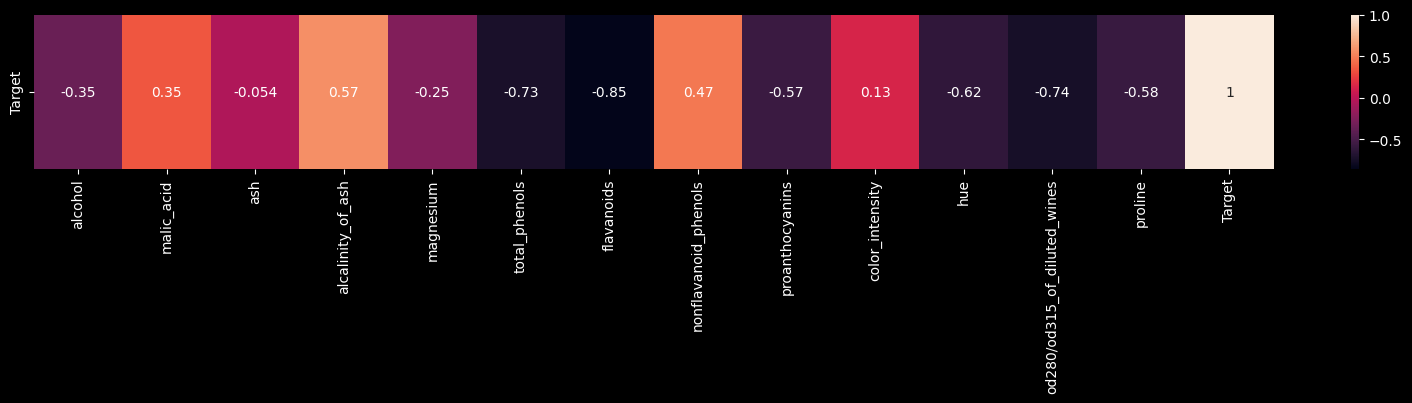

In [19]:
corr = wine_df.corr(method="spearman").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

In [20]:
x_array = x.to_numpy()
y_array = y.to_numpy()

In [21]:
fisher_score.fisher_score(x_array,y_array) # array 


array([ 6,  0,  1, 12,  3,  2,  7, 11,  9,  4,  5, 10,  8])

<Axes: >

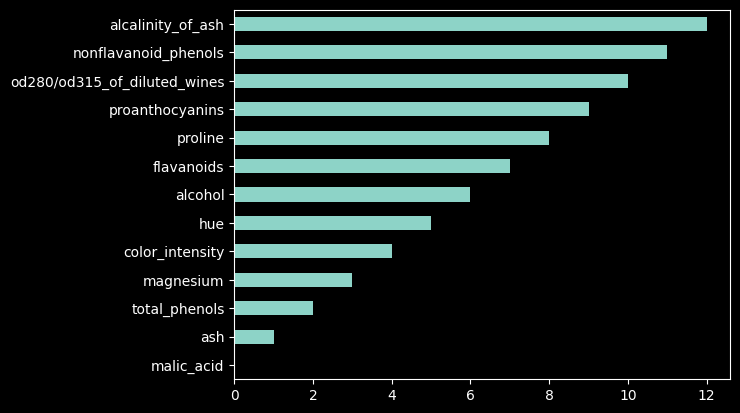

In [22]:
array = fisher_score.fisher_score(x_array, y_array)
s1=pd.Series(array,index=x.columns)
s1.sort_values().plot(kind="barh")

## Fisher score for Boston dataset

In [23]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
x=boston_df.drop("medv",axis=1)
y=boston_df["medv"]


Pearson correlation coefficient 

<Axes: >

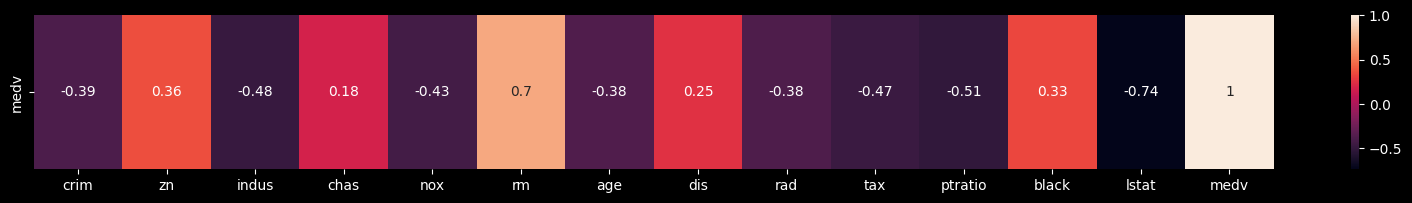

In [25]:
corr = boston_df.corr(method="pearson").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

Spearman correlation coefficient

<Axes: >

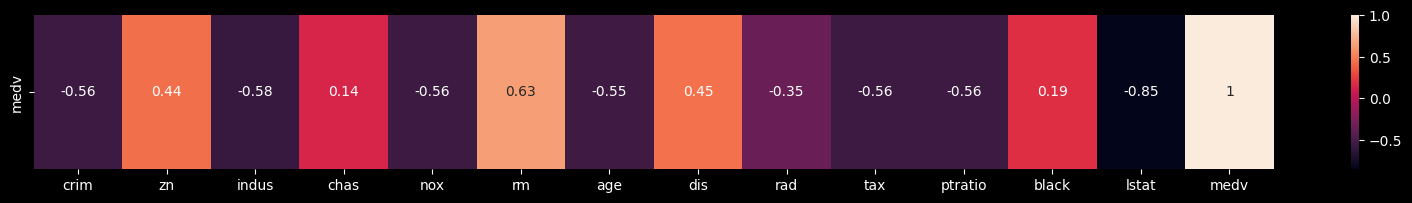

In [26]:
corr = boston_df.corr(method="spearman").tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

In [27]:
x_array=x.to_numpy()
y_array=y.to_numpy()

CPU times: total: 203 ms
Wall time: 257 ms


<Axes: >

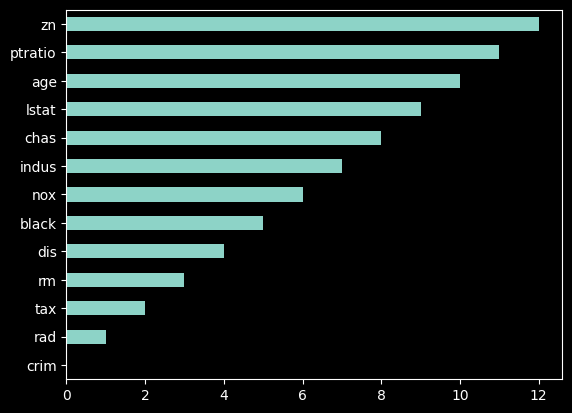

In [28]:
%%time
fisher_rank = fisher_score.fisher_score(x_array, y_array)
s1=pd.Series(fisher_rank,index=x.columns)
s1.sort_values().plot(kind="barh")

# 3. Missing Values ratio 

In [29]:
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [30]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            180
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
titanic_df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            20.202020
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## 4 . Variance threshold method 


In [33]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [34]:
boston_df.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
black       8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

In [35]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
boston_df["Test"] = 100

In [37]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Test
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,100.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,100.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,100.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,100.0
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,100.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,100.0


In [38]:
from sklearn.feature_selection import VarianceThreshold

In [42]:
var_ths = VarianceThreshold(threshold=0.0)
var_ths.fit_transform(boston_df)
array=var_ths.get_support()
array

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [45]:
np.where(array == False)[0][0]

14

In [49]:
boston_df.columns[14]

'Test'

In [50]:
boston_df.columns[np.where(array == False)[0][0]]

'Test'

In [51]:
boston_df.drop(boston_df.columns[np.where(array == False)[0][0]],axis=1,inplace=True)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 5 .Variance inflation factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [54]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [55]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    print(f"Variance inflation factor is :",vif)
    vif_list.append(vif)

Variance inflation factor is : 2.1003728199615233
Variance inflation factor is : 2.8440132669462637
Variance inflation factor is : 14.485757706539308
Variance inflation factor is : 1.1529518589418777
Variance inflation factor is : 73.89494652814788
Variance inflation factor is : 77.94828304638538
Variance inflation factor is : 21.38685048994314
Variance inflation factor is : 14.6996523837492
Variance inflation factor is : 15.167724857920897
Variance inflation factor is : 61.227274009649456
Variance inflation factor is : 85.02954731061801
Variance inflation factor is : 20.104942636229136
Variance inflation factor is : 11.102024772203539


<Axes: >

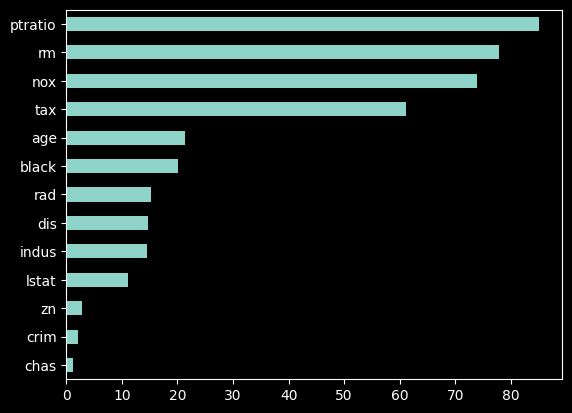

In [56]:
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind="barh")